In [68]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.image as image
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
border = gpd.read_file(
    '/Users/ethanjewell/Desktop/Python Env/Scripting/Map Data/Shapefiles/NATIONAL/National Borders with Provinces/National Borders with Provinces.shp')

In [4]:
modis_fires = gpd.read_file(
    '/Users/ethanjewell/Desktop/Python Env/Scripting/ThermalRadar/MODIS_unfiltered_shp/fire_archive_M-C61_309235.shp')
viirs_fires = gpd.read_file(
    '/Users/ethanjewell/Desktop/Python Env/Scripting/ThermalRadar/VIIRS_unfilitered_shp/fire_archive_SV-C2_309233.shp')
fires = gpd.read_file(
    '/Users/ethanjewell/Downloads/DL_FIRE_SV-C2_309255/fire_archive_SV-C2_309255.shp')

modis_merge = gpd.tools.sjoin(
    modis_fires, border, predicate="intersects", how='inner')

viirs_merge = gpd.tools.sjoin(
    viirs_fires, border, predicate='intersects', how='inner')

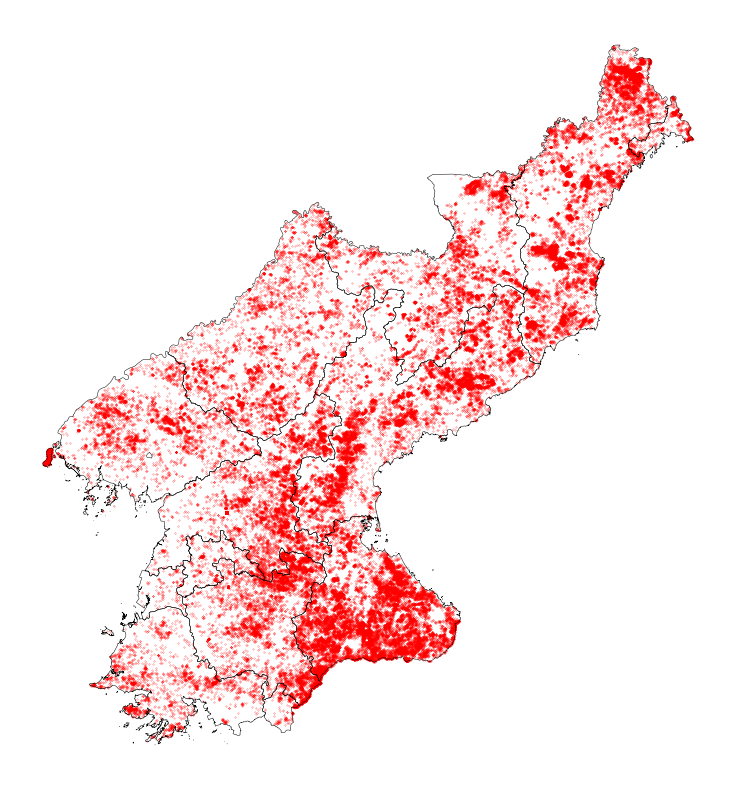

In [17]:
axes = border.boundary.plot(figsize=(10, 10), color='black', linewidth=0.35)
axes.set_axis_off()

modis_merge.plot(ax=axes, color='red', markersize=0.05, alpha=0.8)
viirs_merge.plot(ax=axes, color='red', markersize=0.05, alpha=0.8)

filled_marker_style = dict(marker='*', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')

# axes.scatter(125.7625, 39.0392, marker='*', s=250, color='yellow', edgecolors='black', linewidths=1.5)
# axes.scatter(125.3247, 38.7523, marker='o', s=35, color='black')
# axes.scatter(126.5878, 37.9382, marker='o', s=35, color='black')
# axes.scatter(127.4460, 39.1539, marker='o', s=35, color='black')
# axes.scatter(124.4489, 40.0823, marker='o', s=35, color='black')
# axes.scatter(129.7234, 41.7670, marker='o', s=35, color='black')

names = ['Pyongyang', 'Nampho', 'Kaesong', 'Wonsan', 'Sinuiju', 'Chongjin']

plt.savefig('mar2014.png')

In [31]:
# prov_tally = {}
# csv = pd.read_csv(f'/Users/ethanjewell/Desktop/Python Env/Scripting/ThermalRadar/master_fires_2000_2022_months_aggregated.csv')

# for mon in csv['ACQ_DATE']:
#     if mon not in prov_tally.keys():
#         prov_tally[mon] = 0
#     prov_tally[mon] += 1

# final_csv = pd.DataFrame([prov_tally]).T

# final_csv.to_csv(f'/Users/ethanjewell/Desktop/Python Env/Scripting/ThermalRadar/aggregate_month_tally.csv')

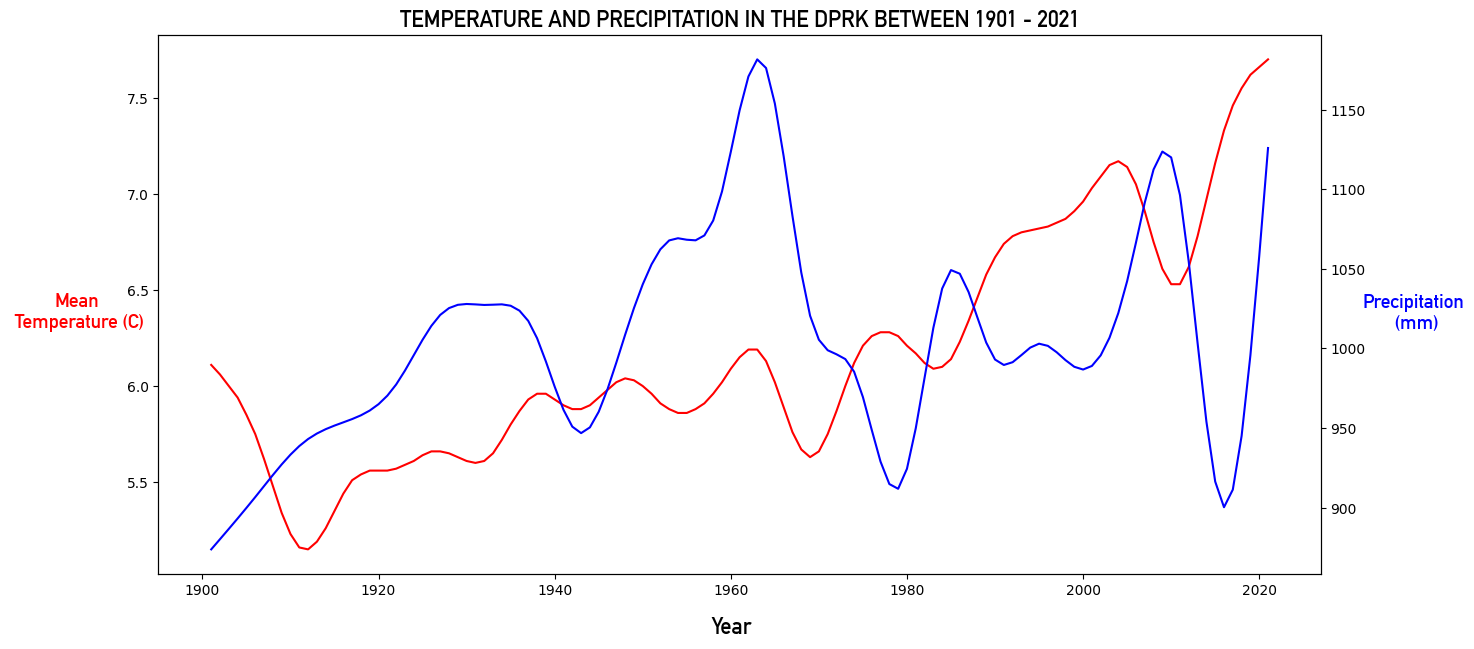

In [80]:
font = {'fontname':'DIN Alternate'}

data = pd.read_csv('/Users/ethanjewell/Desktop/Python Env/Scripting/ThermalRadar/individual_sheets/climactic_indicators.csv', index_col=0)

temp = data['Mean Temperature (Celsius)']
prec = data['Mean Precipitation (mm)']

fig, ax = plt.subplots(figsize=(15,7))

plt.title('Temperature and Precipitation in the DPRK between 1901 - 2021'.upper(), fontsize=16, **font)

ax.set_xlabel('Year', fontsize=16, **font)
ax.xaxis.set_label_coords(0.493, -0.08)

ax.plot(temp, color='red')
ax.set_ylabel('Mean\n Temperature (C)', fontsize=14, color='red', rotation=0, **font)
ax.yaxis.set_label_coords(-0.07,0.45)

ax2 = ax.twinx()
ax2.plot(prec, color='blue')
ax2.set_ylabel('Precipitation\n (mm)', fontsize=14, color='blue', rotation=0, **font)
ax2.yaxis.set_label_coords(1.080,0.520)

plt.savefig('/Volumes/Sandisk/BlackMarble/Charts/Temp vs precipitation, 1901 - 2021.png', transparent=True)


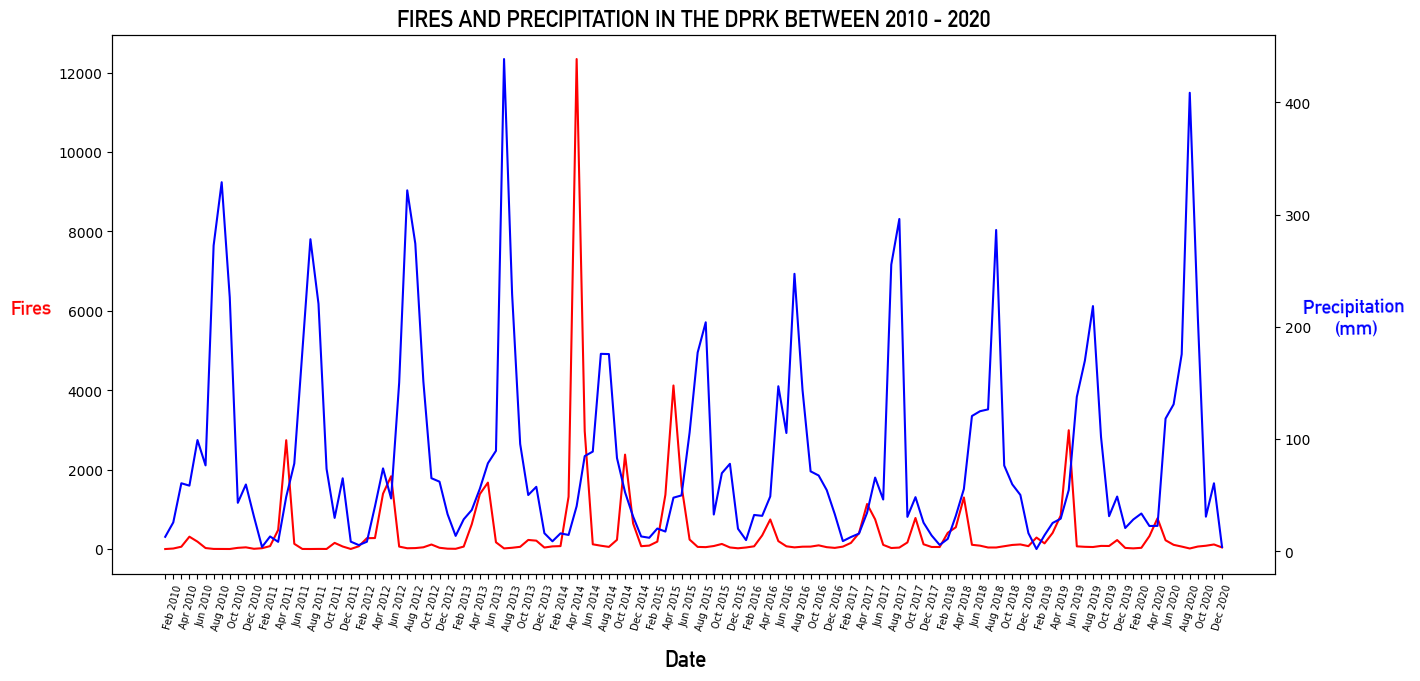

In [135]:
month_tallies = pd.read_csv('/Users/ethanjewell/Desktop/Python Env/Scripting/ThermalRadar/individual_sheets/fires_vs_prec_2010_2020.csv', index_col=0)

fires = month_tallies['Fires']
prec = month_tallies['Precipitation (mm)']

fig, ax = plt.subplots(figsize=(15,7))

plt.title('Fires and Precipitation in the DPRK between 2010 - 2020'.upper(), fontsize=16, **font)
plt.xticks(rotation=75, fontsize=7)

ax.set_xlabel('Date', fontsize=16, **font)
ax.xaxis.set_label_coords(0.493, -0.14)

ax.plot(fires, color='red')
ax.set_ylabel('Fires', fontsize=14, color='red', rotation=1, **font)
ax.yaxis.set_label_coords(-0.07, 0.475)

ax2 = ax.twinx()
ax2.plot(prec, color='blue')
ax2.set_ylabel('Precipitation \n(mm)', fontsize=14, color='blue', rotation=1, **font)
ax2.yaxis.set_label_coords(1.07,0.51)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

plt.savefig('/Volumes/Sandisk/BlackMarble/Charts/Fires vs prec, 2010 - 2020.png', transparent=True)